In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.drop(columns = ['CUST_ID'], inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df['CREDIT_LIMIT'].fillna(min(df['CREDIT_LIMIT']), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(min(df['MINIMUM_PAYMENTS']), inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.019163,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df1=df[df['BALANCE'] < df['BALANCE'].quantile(.95)]
df1=df1[df1['PURCHASES'] < df['PURCHASES'].quantile(.95)]
df1=df1[df1['MINIMUM_PAYMENTS'] < df['MINIMUM_PAYMENTS'].quantile(.95)]
df1=df1[df1['PAYMENTS'] < df['PAYMENTS'].quantile(.95)]
df1=df1[df1['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].quantile(.95)]
df1=df1[df1['PURCHASES_TRX'] < df['PURCHASES_TRX'].quantile(.95)]
df1=df1[df1['ONEOFF_PURCHASES'] < df['ONEOFF_PURCHASES'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE'] < df['CASH_ADVANCE'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE_TRX'] < df['CASH_ADVANCE_TRX'].quantile(.95)]

In [11]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000
max,5906.184924,1.000000,3986.240000,2655.990000,3927.120000,4639.195255,1.000000,1.000000,1.000000,1.166667,14.000000,56.000000,11500.000000,6043.227704,2707.521979,1.000000,12.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6880 non-null   float64
 1   BALANCE_FREQUENCY                 6880 non-null   float64
 2   PURCHASES                         6880 non-null   float64
 3   ONEOFF_PURCHASES                  6880 non-null   float64
 4   INSTALLMENTS_PURCHASES            6880 non-null   float64
 5   CASH_ADVANCE                      6880 non-null   float64
 6   PURCHASES_FREQUENCY               6880 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6880 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6880 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6880 non-null   float64
 10  CASH_ADVANCE_TRX                  6880 non-null   int64  
 11  PURCHASES_TRX                     6880 non-null   int64  
 12  CREDIT

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import silhouette_score, v_measure_score 
from sklearn.cluster import KMeans 

In [16]:
# Normalizacao 

scaler = StandardScaler()
normalized_df = scaler.fit_transform(df1)

In [24]:
alvo = normalized_df
max = 15 
km_silhouette = [] 
km_scores = []
for i in range(2,max): 
    km = KMeans(n_clusters=i, random_state=0).fit(alvo) 
    preds = km.predict(alvo) 
    km_scores.append(-km.score(alvo)) 
    silhouette = silhouette_score(alvo,preds) 
    km_silhouette.append(silhouette) 
    

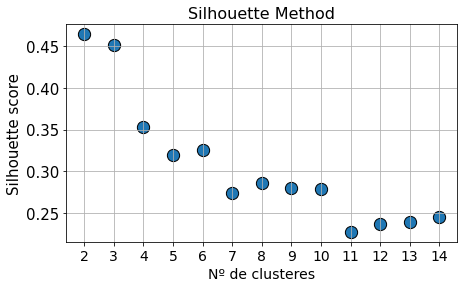

In [25]:
# Plotagem do método da Silhouette (Silhueta) 
plt.figure(figsize=(7,4)) 
plt.title("Silhouette Method",fontsize=16) 
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k') 
plt.grid(True) 
plt.xlabel("Nº de clusteres",fontsize=14) 
plt.ylabel("Silhouette score",fontsize=15) 
plt.xticks([i for i in range(2,max)],fontsize=14) 
plt.yticks(fontsize=15) 
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA 

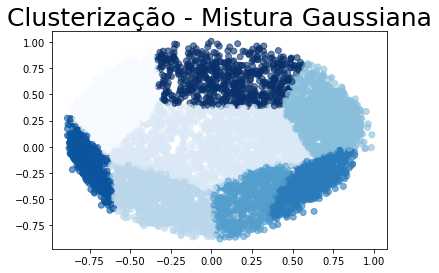

In [27]:
normalized_df = normalize(normalized_df,axis=1) 

pca = PCA(n_components=2)

X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# Plotagem da clusterização (em 2D) 

plt.title('Clusterização - Mistura Gaussiana',fontsize=25) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues')
plt.show()